#  <h1><center> **EXPLORING VENUES IN BANGALORE TO OPEN A SEAFOOD RESTAURANT** </center><h1>
<center>Mathan Raj O</center>
<center>07/04/2020</center>


## Table of Contents

<div  style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a>

2. <a href="#item2">Collect Neighborhood Data</a>

3. <a href="#item3">Explore Neighborhood in Bangalore</a>

4. <a href="#item4">Explore Venues in the Neighborhood</a>

5. <a href="#item5">Methodology</a> 
    
6. <a href="#item6">Exploratory Data Analysis</a>

7. <a href="#item7">Analyze Each Neighborhood</a>

8. <a href="#item8">Cluster Neighborhood</a>

9. <a href="#item9">Inspect Clusters</a>

10. <a href="#item10">Results and Recommendations</a>

11. <a href="#item11">Conclusion</a>  
</font>
</div>

In [3]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import folium
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from itertools import repeat 
from sklearn.cluster import KMeans
%matplotlib inline

<a id='item1'></a>

## 1. Introduction

As part of the Coursera Capstone Project (https://www.coursera.org/learn/applied-data-science-capstone/home/week/4), I have come with the problem of exploring different venues in the neighborhood of Bangalore and suggest the best places to open a seafood restaurant.The objective of this project is to explore different venues in the city for each neighborhood and come up with useful metrics like top 10 venue categories in the city, neighborhood with most venues, map view of neighborhood along with their venues in different colors. Adding to it, the clustering of neighborhood having seafood restaurant will be done to show the areas for new investment.

<a id='item2'></a>

## 2.Collect Neighborhood Data

Get the list of Neighborhoods in Bangalore from the wiki page(https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore)


In [4]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore'
table = pd.read_html(wiki_url)

In [5]:
table[0]

,Name,Image,Summary
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h..."
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...
3,Jeevanbheemanagar,NaN,NaN
4,Malleswaram,NaN,NaN
5,Pete area,NaN,Established by Kempe Gowda I at the time of cr...
6,Sadashivanagar,NaN,Sadashivanagar is an upscale neighbourhood in ...
7,Seshadripuram,NaN,Seshadripuram was established in 1892 to reduc...
8,Shivajinagar,NaN,Shivajinagar is one of the older areas of the ...
9,Ulsoor,NaN,Ulsoor (or Halasuru) is one of the oldest area...


The neighborhood is split in to 8 regions
1. Central
2. 	Eastern
3. 	North-Eastern
4. 	Northern
5. 	South-Eastern
6. 	Southern
7. 	Southern suburbs
8. 	Western

We will select only the neighborhood names for each region and create a datafrom from it.






In [6]:
tables=[]
for i in range(0,7):
    for j in range(len(table[i])):
        tables.append(table[i]['Name'][j])

In [7]:
df = pd.DataFrame(tables,columns=['Neighborhood'])

In [8]:
df

,Neighborhood
0,Cantonment area
1,Domlur
2,Indiranagar
3,Jeevanbheemanagar
4,Malleswaram
5,Pete area
6,Sadashivanagar
7,Seshadripuram
8,Shivajinagar
9,Ulsoor


'Pete area' is the old name of 'Chickpet', so replacing it in the dataframe

In [9]:
df.replace('Pete area','Chickpet',inplace=True)

Replacing the value Jeevanbheemanagar to Jeevanbheema nagar to avoid error while retrieving the location details.

In [10]:
df.replace('Jeevanbheemanagar','Jeevanbheema nagar',inplace=True)

In [11]:
len(df)

55

There are totally __55__ neighborhoods in Bangalore city

**Lets get the latitude and the longitude coordinates of each neighborhood**

In [13]:
Latitude=[]
Longitude=[]
for i in range(df.shape[0]):
  try:
    geolocator = Nominatim(user_agent='four square')
    place = df['Neighborhood'][i]+', Bengaluru, India'
    locations = geolocator.geocode(place,timeout=1000)
    print(df['Neighborhood'][i])
    Latitude.append(locations.latitude)
    Longitude.append(locations.longitude)
  except (AttributeError,RuntimeError, TypeError, NameError):
    print('error',df['Neighborhood'][i])

Cantonment area
Domlur
Indiranagar
Jeevanbheema nagar
Malleswaram
Chickpet
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kalyan Nagar
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout
Electronic City
HSR Layout
Koramangala
Madiwala
Banashankari
Basavanagudi
Girinagar
J. P. Nagar
Jayanagar
Kumaraswamy Layout
Padmanabhanagar
Uttarahalli
Anjanapura
Arekere
Begur
Gottigere
Hulimavu
Kothnur


In [14]:
len(Latitude),len(Longitude)

(55, 55)

Lets validate the location details. All the latitude and location data of bangalore should start with (12,14) and (77,78)

In [19]:
pd.Series(Latitude).between(12,14,inclusive=False)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
dtype: bool

In [20]:
pd.Series(Longitude).between(77,78,inclusive=False)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
dtype: bool

From both the list, index 12 is out of range, lets check the neighborhood and its location details

In [24]:
df.iloc[12], Latitude[12], Longitude[12]

(Neighborhood    CV Raman Nagar
 Name: 12, dtype: object, 17.2510682, 80.1651978)

Geocode has returned location details of CV Raman Nagar, Hyderabad instead of Bangalore. So, lets manually change the location details for this index

In [27]:
Latitude[12] = 12.9829424
Longitude[12]= 77.6438991

Adding the latitude and longitude to the dataframe

In [28]:
df['Latitude']=Latitude
df['Longitude']=Longitude

In [29]:
df.head()

,Neighborhood,Latitude,Longitude
0,Cantonment area,13.027925,77.533676
1,Domlur,12.962467,77.638196
2,Indiranagar,12.973291,77.640467
3,Jeevanbheema nagar,12.965818,77.657662
4,Malleswaram,13.016341,77.558664


In [30]:
df.isna().sum()

Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
bang_latitude=12.9791198
bang_longitude=77.5912997

<a id='item3'></a>

## 3.Explore Neighborhood in Bangalore

In [474]:

bang_map = folium.Map(location=[bang_latitude, bang_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        parse_html=False).add_to(bang_map)  

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
  folium.Marker([lat, lng], popup=label).add_to(bang_map)
    
bang_map.save('Bangalore_Neighborhood_Map.html')
bang_map





<a id='item4'></a>

## 4.Explore Venues in the Neighborhood

###### Foursquare API

In [35]:
CLIENT_ID = 'FEVOBQA4RKSCY1YIPFWXESFZ530X3TL03CL0QKL4SACUY450' # Foursquare ID
CLIENT_SECRET = '5FAMDZNCGGBNFPTGDLXMWAX3PE30FZ5GGYIARJHJF153D3AL' #  Foursquare Secret
VERSION = '20200407'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FEVOBQA4RKSCY1YIPFWXESFZ530X3TL03CL0QKL4SACUY450
CLIENT_SECRET:5FAMDZNCGGBNFPTGDLXMWAX3PE30FZ5GGYIARJHJF153D3AL


Function to get the venues around __1KM__ for each neighborhood using Foursquare API

In [220]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [221]:
bangalore_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Cantonment area
Domlur
Indiranagar
Jeevanbheema nagar
Malleswaram
Chickpet
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kalyan Nagar
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout
Electronic City
HSR Layout
Koramangala
Madiwala
Banashankari
Basavanagudi
Girinagar
J. P. Nagar
Jayanagar
Kumaraswamy Layout
Padmanabhanagar
Uttarahalli
Anjanapura
Arekere
Begur
Gottigere
Hulimavu
Kothnur


In [224]:
len(bangalore_venues['Neighborhood'].unique())

55

In [225]:
bangalore_venues.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Cantonment area,13.027925,77.533676,Vivanta by Taj - Yeshwantpur,13.029152,77.540565,Hotel
1,Cantonment area,13.027925,77.533676,"Palette, Taj Vivanta",13.029171,77.540681,Restaurant
2,Cantonment area,13.027925,77.533676,Uppu Munchi,13.027989,77.541080,Seafood Restaurant
3,Cantonment area,13.027925,77.533676,Azure,13.029278,77.540712,Mediterranean Restaurant
4,Cantonment area,13.027925,77.533676,McDonald's,13.033423,77.531138,Fast Food Restaurant


In [226]:
bangalore_venues.shape

(1786, 7)

Lets plot the venues dataframe on the map

Lets create color array for 55 Neighborhoods

In [227]:
colors_array = cm.rainbow(np.linspace(0, 1, 55))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [228]:
col_list=[]
for index,name in enumerate(bangalore_venues['Neighborhood'].unique()):
        length = len(bangalore_venues[bangalore_venues['Neighborhood']==name])
        col_list.extend(repeat(rainbow[index],length))

In [229]:
len(col_list)

1786

Bangalore Map for __1786__ venues, __55__ Neighborhoods

In [471]:
bangalore_map = folium.Map(location = [bang_latitude, bang_longitude], zoom_start = 12)
for index, (name, latitude, longitude) in enumerate(zip(bangalore_venues['Venue'], bangalore_venues['Venue_Latitude'], bangalore_venues['Venue_Longitude'])):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = col_list[index],
        # icon=folium.Icon(color=col_list[index], prefix='fa'), 
        fill = True,
        fill_color = 'black',
        fill_opacity = 0.8,
        ).add_to(bangalore_map)


bangalore_map.save("Bangalore_Venues_Map.html")
bangalore_map

<a id='item5'></a>

## 5.Methodology

This project aims to explore different venus in the neighborhood of the city and find the best place to start a seafood restaurant.
- First, I will retrieve the list of the neighborhood in the city from the wiki URL(https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore) and perform data cleaning and extracting the neighborhood name from the HTML table. The extracted list will have only the neighborhood names, so we need to fetch the location details for each. So, I will be using the geocode library to gather longitude and latitude for each neighborhood. There is a chance of invalid location data, so it's better to validate the location details within the city latitude and longitude range and update the list manually if any invalid data is found. Then, plot the neighborhood details on the map using the folium library.

- Secondly, I will be exploring the top 100 venues for each neighborhood within a 1KM radius. To achieve this, I will use Foursqured explore API(https://api.foursquare.com/v2/venues/explore) to retrieve the nearby venue name, latitude, longitude, and category using the neighborhood name and location details. To differentiate venues for each neighborhood, a map with a different color for each neighborhood will be plotted.

- Perform Data Analysis to gather the following metrics:
    - Count plot to show the number of venues for each neighborhood.
    - Top 10 Venue Categories

- To meet the objective of this project, we need to cluster the neighborhood. But, before that, we need to convert the categorical data to numerical. So, I will use one-hot encoding to convert the venue categorical feature into dummies and I group the neighborhood by taking the mean of the frequency of occurrence of each category. Then filter to include only seafood restaurant data, with this information we will able to cluster the neighborhood based on a seafood restaurant.
- Perform clustering using K-means and analyze the clustering plot to conclude recommendations of the best places to start Seafood Restaurant.

<a id='item6'></a>

## 6.Exploratory Data Analysis

Let's check how many venues were returned for each neighborhood

In [231]:
venues_per_neighborhood_df=bangalore_venues.groupby('Neighborhood').count().reset_index('Neighborhood')
venues_per_neighborhood_df = venues_per_neighborhood_df.iloc[:,0:2]

In [232]:
venues_per_neighborhood_df.rename(columns={'Neighborhood_Latitude':'Count'},inplace=True)

In [233]:
venues_per_neighborhood_df.sort_values('Count',ascending=False,inplace=True)

In [234]:
venues_per_neighborhood_df.reset_index(drop=True,inplace=True)

In [235]:
venues_per_neighborhood_df.head()

,Neighborhood,Count
0,Indiranagar,100
1,Koramangala,100
2,Jayanagar,100
3,Domlur,100
4,CV Raman Nagar,82


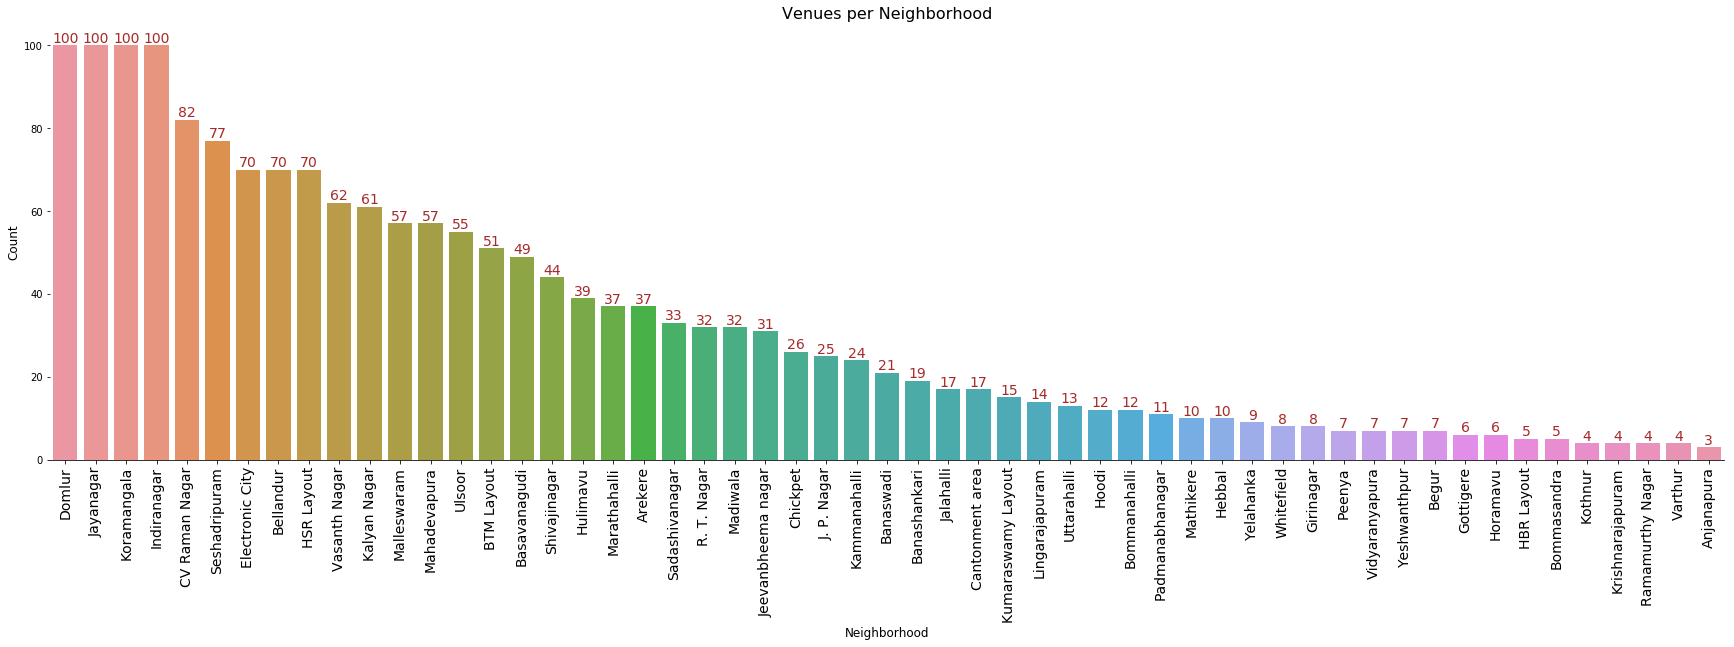

In [236]:
plt.figure(figsize=(30,8))
ax=sns.countplot(bangalore_venues['Neighborhood'],order = bangalore_venues['Neighborhood'].value_counts().index)
for p in ax.patches:
  ax.text(x=(p.get_x()+p.get_width()/2.),y=p.get_height(),s=int(p.get_height()),
               fontsize=14, color='brown',ha='center',va='bottom')
for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(14)
plt.xticks(rotation='vertical')
ax.set_title('Venues per Neighborhood',fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Neighborhood',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

As per the above plot __Domlur, Jaynagar, Kormangala, Indiranagar, CV Raman Nagar, Seshadipuram, Electronic City, Bellandur, HSR Layout, Vasanth Nagar__ has more venues compared to other neighborhoods

In [237]:
print('There are {} unique venue categories.'.format(len(bangalore_venues['Venue_Category'].unique())))

There are 185 unique venue categories.


**Top Venue Categories**

In [238]:
top_venue_category_df = bangalore_venues['Venue_Category'].value_counts().rename_axis('Venue_Category').reset_index(name='counts')

In [493]:
top_venue_category_df.head()

,Venue_Category,counts
0,Indian Restaurant,295
1,Café,117
2,Fast Food Restaurant,63
3,Coffee Shop,59
4,Ice Cream Shop,55


In [240]:
sum(top_venue_category_df.counts)

1786

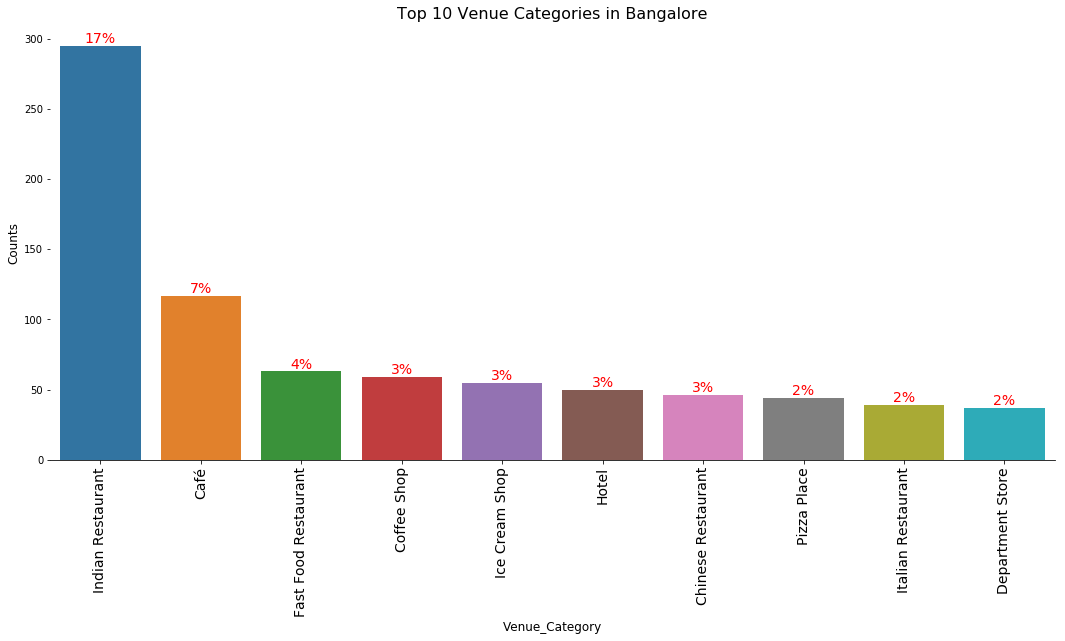

In [491]:
figure = plt.figure(figsize=(18,8))
ax = sns.barplot(x=top_venue_category_df['Venue_Category'][:10],y=top_venue_category_df['counts'][:10])
for p in ax.patches:
  ax.text(x=(p.get_x()+p.get_width()/2.),y=p.get_height(),s='{:.0%}'.format((p.get_height()/1786)),
               fontsize=14, color='red',ha='center',va='bottom')
for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(14)
plt.xticks(rotation='vertical')
ax.set_title('Top 10 Venue Categories in Bangalore',fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Venue_Category',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show()

From the above bar plot, it is clear that __Inidan Restaurants__ category accounts for almost __17%__ of the venues in the Bangalore city. And it is followed by __caffe__ of __7%__ and __Fast Food Restaurant__ of __4%__.

<a id='item7'></a>

## 7.Analyze Each Neighborhood

Lets apply one hot encoding to venu categories

In [242]:
# one hot encoding
bangalore_onehot = pd.get_dummies(bangalore_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangalore_onehot['Neighborhood'] = bangalore_venues['Neighborhood'] 

# move neighborhood column to the first column
features = list(bangalore_onehot.columns)
features.remove('Neighborhood')
fixed_columns = ['Neighborhood'] + features
bangalore_onehot = bangalore_onehot[fixed_columns]

bangalore_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nightclub,Noodle House,North Indian Restaurant,Office,Outlet Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Resort,Rest Area,Restaurant,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Taco Place,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Women's Store,Yoga Studio
0,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [243]:
bangalore_onehot.shape

(1786, 186)

In [244]:
len(bangalore_onehot['Neighborhood'].unique())

55

let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [245]:
bangalore_grouped = bangalore_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nightclub,Noodle House,North Indian Restaurant,Office,Outlet Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Resort,Rest Area,Restaurant,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Taco Place,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Women's Store,Yoga Studio
0,Anjanapura,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,Arekere,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.027027,0.027027,0.0,0.0,0.027027,0.0,0.000000,0.0,0.027027,0.027027,0.027027,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.081081,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.054054,0.0,0.000000,0.0,0.0,0.027027,0.0,0.0,0.0,0.

In [247]:
bangalore_grouped.shape

(55, 186)

In [448]:
len(bangalore_grouped[(bangalore_grouped["Seafood Restaurant"] > 0)])

12

In [501]:
restaurant_df = bangalore_grouped.filter(regex='(Seafood |Neighborhood)').copy()

In [502]:
restaurant_df.head()

,Neighborhood,Seafood Restaurant
0,Anjanapura,0.000000
1,Arekere,0.000000
2,BTM Layout,0.000000
3,Banashankari,0.052632
4,Banaswadi,0.047619


Function to sort the venues in descending order.

In [452]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

let's create the new dataframe and display the top 10 venues for each neighborhood.

In [453]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_grouped['Neighborhood']

for ind in np.arange(bangalore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,ATM,Pool,Campground,Dumpling Restaurant,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
1,Arekere,Indian Restaurant,Café,Movie Theater,Clothing Store,Fast Food Restaurant,Electronics Store,South Indian Restaurant,Multiplex,Pizza Place,Dumpling Restaurant
2,BTM Layout,Indian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Snack Place,Park,Bakery,Chinese Restaurant,Coffee Shop,Café,Sandwich Place
3,Banashankari,Indian Restaurant,Café,Hookah Bar,Bakery,Fast Food Restaurant,Metro Station,Seafood Restaurant,Breakfast Spot,South Indian Restaurant,Jewelry Store
4,Banaswadi,Indian Restaurant,Department Store,Café,Intersection,Seafood Restaurant,Kerala Restaurant,Bistro,Tea Room,BBQ Joint,Pizza Place


In [451]:
neighborhoods_venues_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
Neighborhood             55 non-null object
1st Most Common Venue    55 non-null object
dtypes: object(2)
memory usage: 960.0+ bytes


<a id='item8'></a>

## 8.Cluster Neighborhood

In [435]:
#lets drop the Neighborhood Column
bangalore_grouped_clustering = restaurant_df.drop('Neighborhood', 1)

In [436]:

WCSS = []

#Find the best n_cluster using elbow method
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(bangalore_grouped_clustering)
    WCSS.append(kmeans.inertia_)

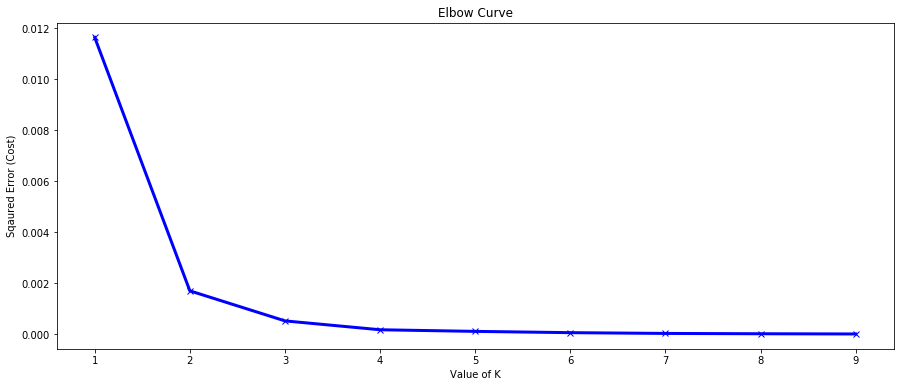

In [437]:
plt.figure(figsize=(15,6))
plt.plot(range(1, 10), WCSS,'bx-',linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.title('Elbow Curve')
plt.show()

As per the elbow curve, there is a steep decrease after 3 so let's choose n_clusters =__3__ 

In [522]:
kclusters=3

In [523]:

kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(bangalore_grouped_clustering)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [524]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

In [526]:
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [527]:
# add clustering labels

bangalore_merged = restaurant_df.copy()

# merge bangalore_merged with df to add latitude/longitude for each neighborhood
bangalore_merged = bangalore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bangalore_merged = bangalore_merged.join(df.set_index('Neighborhood'), on='Neighborhood')
bangalore_merged.head()

,Neighborhood,Seafood Restaurant,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,Anjanapura,0.000000,1,ATM,Pool,Campground,Dumpling Restaurant,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,12.858081,77.558071
1,Arekere,0.000000,1,Indian Restaurant,Café,Movie Theater,Clothing Store,Fast Food Restaurant,Electronics Store,South Indian Restaurant,Multiplex,Pizza Place,Dumpling Restaurant,12.878470,77.604179
2,BTM Layout,0.000000,1,Indian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Snack Place,Park,Bakery,Chinese Restaurant,Coffee Shop,Café,Sandwich Place,12.915177,77.610282
3,Banashankari,0.052632,2,Indian Restaurant,Café,Hookah Bar,Bakery,Fast Food Restaurant,Metro Station,Seafood Restaurant,Breakfast Spot,South Indian Restaurant,Jewelry Store,12.915221,77.573598
4,Banaswadi,0.047619,2,Indian Restaurant,Department Store,Café,Intersection,Seafood Restaurant,Kerala Restaurant,Bistro,Tea Room,BBQ Joint,Pizza Place,13.014162,77.651854


In [528]:
cluster_venues=bangalore_merged.join(bangalore_venues.set_index('Neighborhood'), on='Neighborhood')

In [476]:
bangalore_merged.shape

(55, 15)

In [529]:
# create map
map_clusters = folium.Map(location=[bang_latitude, bang_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['blue','green','red']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangalore_merged['Latitude'], bangalore_merged['Longitude'], bangalore_merged['Neighborhood'], bangalore_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item9'></a>

## 9.Inspect Clusters 

In [512]:
bangalore_merged[bangalore_merged['Cluster_Labels'] == 0].reset_index()

,index,Neighborhood,Seafood Restaurant,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,18,HSR Layout,0.014286,0,Indian Restaurant,Café,Ice Cream Shop,Pizza Place,Snack Place,Bakery,Gym,Fast Food Restaurant,South Indian Restaurant,Liquor Store,12.911623,77.638862
1,28,Kalyan Nagar,0.016393,0,Indian Restaurant,Fast Food Restaurant,BBQ Joint,Café,Ice Cream Shop,Korean Restaurant,Chinese Restaurant,Bistro,Pizza Place,Lounge,13.022142,77.640337
2,30,Koramangala,0.010000,0,Indian Restaurant,Café,Ice Cream Shop,Dessert Shop,Italian Restaurant,Lounge,Coffee Shop,Chinese Restaurant,Pizza Place,Bar,12.934011,77.622230
3,44,Sadashivanagar,0.030303,0,Indian Restaurant,Coffee Shop,Café,Dessert Shop,Gym,Ice Cream Shop,Department Store,Field,Farmers Market,Seafood Restaurant,13.007708,77.579589
4,45,Seshadripuram,0.012987,0,Indian Restaurant,Clothing Store,Hotel,Ice Cream Shop,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Karnataka Restaurant,Pizza Place,Coffee Shop,12.993188,77.575342
5,47,Ulsoor,0.018182,0,Hotel,Café,Department Store,Bar,Indian Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Clothing Store,Restaurant,12.977879,77.624670
6,50,Vasanth Nagar,0.016129,0,Indian Restaurant,Hotel,Coffee Shop,Café,Chinese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Art Gallery,Ice Cream Shop,12.988721,77.585169


In [511]:
cluster_venues[(cluster_venues['Cluster_Labels'] == 0)&(cluster_venues['Venue_Category']=='Seafood Restaurant')].reset_index()

,index,Neighborhood,Seafood Restaurant,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,18,HSR Layout,0.014286,0,Indian Restaurant,Café,Ice Cream Shop,Pizza Place,Snack Place,Bakery,Gym,Fast Food Restaurant,South Indian Restaurant,Liquor Store,12.911623,77.638862,12.911623,77.638862,Parika,12.912008,77.639345,Seafood Restaurant
1,28,Kalyan Nagar,0.016393,0,Indian Restaurant,Fast Food Restaurant,BBQ Joint,Café,Ice Cream Shop,Korean Restaurant,Chinese Restaurant,Bistro,Pizza Place,Lounge,13.022142,77.640337,13.022142,77.640337,Manasa Fish Land,13.014269,77.642630,Seafood Restaurant
2,30,Koramangala,0.010000,0,Indian Restaurant,Café,Ice Cream Shop,Dessert Shop,Italian Restaurant,Lounge,Coffee Shop,Chinese Restaurant,Pizza Place,Bar,12.934011,77.622230,12.934011,77.622230,coast II coast,12.936924,77.624761,Seafood Restaurant
3,44,Sadashivanagar,0.030303,0,Indian Restaurant,Coffee Shop,Café,Dessert Shop,Gym,Ice Cream Shop,Department Store,Field,Farmers Market,Seafood Restaurant,13.007708,77.579589,13.007708,77.579589,Pulimunchi,13.006698,77.578968,Seafood Restaurant
4,45,Seshadripuram,0.012987,0,Indian Restaurant,Clothing Store,Hotel,Ice Cream Shop,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Karnataka Restaurant,Pizza Place,Coffee Shop,12.993188,77.575342,12.993188,77.575342,Sana-di-ge,12.985438,77.579605,Seafood Restaurant
5,47,Ulsoor,0.018182,0,Hotel,Café,Department Store,Bar,Indian Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Clothing Store,Restaurant,12.977879,77.624670,12.977879,77.624670,Carnival-De-Goa,12.974941,77.620096,Seafood Restaurant
6,50,Vasanth Nagar,0.016129,0,Indian Restaurant,Hotel,Coffee Shop,Café,Chinese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Art Gallery,Ice Cream Shop,12.988721,77.585169,12.988721,77.585169,Sana-di-ge,12.985438,77.579605,Seafood Restaurant


In [530]:
bangalore_merged[bangalore_merged['Cluster_Labels'] == 1].reset_index()

,index,Neighborhood,Seafood Restaurant,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,0,Anjanapura,0.0,1,ATM,Pool,Campground,Dumpling Restaurant,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,12.858081,77.558071
1,1,Arekere,0.0,1,Indian Restaurant,Café,Movie Theater,Clothing Store,Fast Food Restaurant,Electronics Store,South Indian Restaurant,Multiplex,Pizza Place,Dumpling Restaurant,12.878470,77.604179
2,2,BTM Layout,0.0,1,Indian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Snack Place,Park,Bakery,Chinese Restaurant,Coffee Shop,Café,Sandwich Place,12.915177,77.610282
3,5,Basavanagudi,0.0,1,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Ice Cream Shop,Café,Italian Restaurant,Bakery,Restaurant,Breakfast Spot,Plaza,12.941726,77.575502
4,6,Begur,0.0,1,ATM,Athletics & Sports,Lake,Fast Food Restaurant,Playground,Resort,Hotel Pool,Art Gallery,Electronics Store,Flea Market,12.863389,77.613011
5,7,Bellandur,0.0,1,Indian Restaurant,Hotel,Italian Restaurant,Lounge,Coffee Shop,Mexican Restaurant,Café,Electronics Store,Park,Pizza Place,12.979120,77.591300
6,8,Bommanahalli,0.0,1,Indian Restaurant,Coffee Shop,Clothing Store,Café,Tea Room,Asian Restaurant,Chettinad Restaurant,Shop & Service,Vegetarian / Vegan Restaurant,Dessert Shop,12.908945,77.623904
7,9,Bommasandra,0.0,1,Coffee Shop,Indian Restaurant,Department Store,Chinese Restaurant,Sporting Goods Shop,Yoga Studio,Eastern European Restaurant,Financial or Legal Service,Field,Fast Food Restaurant,12.816244,77.691611
8,10,CV Raman Nagar,0.0,1,Indian Restaurant,Café,Pub,Bar,Vegetarian / Vegan Restaurant,Andhra Restaurant,Dessert Shop,Pizza Place,Fast Food Restaurant,Restaurant,12.982942,77.643899
9,13,Domlur,0.0,1,Indian Restaurant,Café,Restaurant,Pub,Italian Restaurant,Hotel,Sports Bar,Lounge,Coffee Shop,Cupcake Shop,12.962467,77.638196


In [513]:
cluster_venues[(cluster_venues['Cluster_Labels'] == 1)&(cluster_venues['Venue_Category']=='Seafood Restaurant')].reset_index()

,index,Neighborhood,Seafood Restaurant,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category


In [531]:
bangalore_merged[bangalore_merged['Cluster_Labels'] == 2].reset_index()

,index,Neighborhood,Seafood Restaurant,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,3,Banashankari,0.052632,2,Indian Restaurant,Café,Hookah Bar,Bakery,Fast Food Restaurant,Metro Station,Seafood Restaurant,Breakfast Spot,South Indian Restaurant,Jewelry Store,12.915221,77.573598
1,4,Banaswadi,0.047619,2,Indian Restaurant,Department Store,Café,Intersection,Seafood Restaurant,Kerala Restaurant,Bistro,Tea Room,BBQ Joint,Pizza Place,13.014162,77.651854
2,11,Cantonment area,0.058824,2,Indian Restaurant,Light Rail Station,Mediterranean Restaurant,Restaurant,Food Court,Spa,Punjabi Restaurant,Bar,Seafood Restaurant,Chinese Restaurant,13.027925,77.533676
3,12,Chickpet,0.038462,2,Indian Restaurant,Theater,Flea Market,Indie Movie Theater,Seafood Restaurant,Rest Area,Market,Rajasthani Restaurant,Food,Bookstore,12.968003,77.578642
4,29,Kammanahalli,0.041667,2,Indian Restaurant,Department Store,Fast Food Restaurant,Kerala Restaurant,Chinese Restaurant,Bakery,Auto Dealership,Falafel Restaurant,Mobile Phone Shop,Steakhouse,13.009346,77.637709


In [514]:
cluster_venues[(cluster_venues['Cluster_Labels'] == 2)&(cluster_venues['Venue_Category']=='Seafood Restaurant')].reset_index()

,index,Neighborhood,Seafood Restaurant,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,3,Banashankari,0.052632,2,Indian Restaurant,Café,Hookah Bar,Bakery,Fast Food Restaurant,Metro Station,Seafood Restaurant,Breakfast Spot,South Indian Restaurant,Jewelry Store,12.915221,77.573598,12.915221,77.573598,Sea Spice,12.918814,77.568774,Seafood Restaurant
1,4,Banaswadi,0.047619,2,Indian Restaurant,Department Store,Café,Intersection,Seafood Restaurant,Kerala Restaurant,Bistro,Tea Room,BBQ Joint,Pizza Place,13.014162,77.651854,13.014162,77.651854,Manasa Fish Land,13.014269,77.642630,Seafood Restaurant
2,11,Cantonment area,0.058824,2,Indian Restaurant,Light Rail Station,Mediterranean Restaurant,Restaurant,Food Court,Spa,Punjabi Restaurant,Bar,Seafood Restaurant,Chinese Restaurant,13.027925,77.533676,13.027925,77.533676,Uppu Munchi,13.027989,77.541080,Seafood Restaurant
3,12,Chickpet,0.038462,2,Indian Restaurant,Theater,Flea Market,Indie Movie Theater,Seafood Restaurant,Rest Area,Market,Rajasthani Restaurant,Food,Bookstore,12.968003,77.578642,12.968003,77.578642,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
4,29,Kammanahalli,0.041667,2,Indian Restaurant,Department Store,Fast Food Restaurant,Kerala Restaurant,Chinese Restaurant,Bakery,Auto Dealership,Falafel Restaurant,Mobile Phone Shop,Steakhouse,13.009346,77.637709,13.009346,77.637709,Manasa Fish Land,13.014269,77.642630,Seafood Restaurant


<a id='item10'></a>

## 10.Results and Recommendations

For __55__ Neighborhoods in the Bangalore city, a total of __1786__ venus was collected and analyzed.

The following are the key takeaways:
    
   - Indian Restaurants category accounts for almost __17%__ of the venues in the Bangalore city. And it is followed by caffe of 7% and Fast Food Restaurant of __4%__. So, people who have a preference for these place can without any hesitation
   - Domlur, Jaynagar, Kormangala, Indiranagar, CV Raman Nagar, Seshadipuram, Electronic City, Bellandur, HSR Layout, Vasanth Nagar has more than __70__ venues when compared to other neighborhoods which include restaurants, fitness, park, etc. No doubt why these places are always preferred for shopping and dining out.

**Clustering Resuls**:
<table style="width:60%">
<tr>
<th>Cluster</th>
<th>Neighborhood></th>
<th>Venue</th>
</tr>

<tr>
<td>cluster1(Red Color)</td>
<td>Neighborhood with 1 Seafood Restaurant</td>
<td>HSR Layout, Kalyan Nagar, Kormangala, Sadashivanagar, Ulsoor, etc</td>
</tr>

<tr>
<td>cluster2(Blue Color)</td>
<td>Neighborhood with Zero Seafood Restaurant</td>
<td>BTM Layour, Basavanagudi, CV Raman Nagar, Indira Nagar, Hebbal, etc</td>
</tr>
 
<tr>
<td>cluster3(Green Color)</td>
<td>Neighborhood with 1 Seafood Restaurant</td>
<td>Banashankari, Banaswadi, Cantonment area, Chickpet, Kammanahallic</td>
</tr>
</table>



   - With __295__ Indian Restaurants available, there only __12__ seafood restaurants in the city which accounts for only __0.6%__of the venues in the Bangalore city. This is not a surprise as the nearer coastal area is not less than 8 hours.
   - Cluster 2 will be the ideal place to start a seafood restaurant considering most of the popular neighborhoods fall in this category and there are no seafood restaurants available here. Cluster 1 has 7 and Cluster 3 has 5 restaurants that can also be kept as an option if you have the right source and tactics to compete. Parik, Pulimunchi, Manasa Fish Land, Uppu Munchi, Sea Spice are some of the competitors in the cluster 1 and 3 neighborhoods.
   - This project has some limitations like the venues are fetched only for 1KM radius, so there is a high chance of data missing out.

__Cluster2__ is the real winner given there are no seafood restaurants.
   


<a id='item11'></a>

## 11.Conclusion

By using the Neighborhood data from Wikipedia and Four Square explore API data we were able to analyze and explore the various venues for each neighborhood in Bangalore. Furthermore, the cluster of the neighborhood helped us in recommending the best places for those who are interested in starting a seafood restaurant in Bangalore.